# Exploratory Data Analysis of ICU Patients

`hospital_expire_flag`, indicates in-hospital mortality (0 = survived, 1 = died).

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
patients = pd.read_csv("PATIENTS.csv")
admissions = pd.read_csv("ADMISSIONS.csv")
icu = pd.read_csv("ICUSTAYS.csv")

 info(), examine the data structure 
 describe(), produced a numerical summary.
 isnull().sum(), checked for missing data.

In [125]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [126]:
patients.describe(include="all")

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
count,100.000000,100.000000,100,100,100,70,77,100.0
unique,NaN,NaN,2,99,100,70,77,NaN
top,NaN,NaN,F,2058-04-23 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,NaN
freq,NaN,NaN,55,2,1,1,1,NaN
mean,20452.580000,26162.330000,NaN,NaN,NaN,NaN,NaN,1.0
std,10982.043163,16201.834705,NaN,NaN,NaN,NaN,NaN,0.0
min,9467.000000,10006.000000,NaN,NaN,NaN,NaN,NaN,1.0
25%,9526.500000,10068.500000,NaN,NaN,NaN,NaN,NaN,1.0
50%,20209.000000,25128.000000,NaN,NaN,NaN,NaN,NaN,1.0
75%,31391.250000,42276.500000,NaN,NaN,NaN,NaN,NaN,1.0


In [127]:
patients.isnull().sum()

row_id          0
subject_id      0
gender          0
dob             0
dod             0
dod_hosp       30
dod_ssn        23
expire_flag     0
dtype: int64

In [128]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

In [129]:
admissions.isnull().sum()

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
dtype: int64

In [130]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          136 non-null    int64  
 1   subject_id      136 non-null    int64  
 2   hadm_id         136 non-null    int64  
 3   icustay_id      136 non-null    int64  
 4   dbsource        136 non-null    object 
 5   first_careunit  136 non-null    object 
 6   last_careunit   136 non-null    object 
 7   first_wardid    136 non-null    int64  
 8   last_wardid     136 non-null    int64  
 9   intime          136 non-null    object 
 10  outtime         136 non-null    object 
 11  los             136 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 12.9+ KB


statistical summary of the length of stay (in days) in the ICU.

In [131]:
icu["los"].describe()

count    136.000000
mean       4.452457
std        6.196828
min        0.105900
25%        1.233525
50%        2.111450
75%        4.329050
max       35.406500
Name: los, dtype: float64

The patient numbers are different in datasets

# Patients: 100 
# Admissions: 129 
# ICU stays: 136

In [132]:
admissions["hospital_expire_flag"].value_counts()

hospital_expire_flag
0    89
1    40
Name: count, dtype: int64


  Gender distributions show there are more female patients than men patients

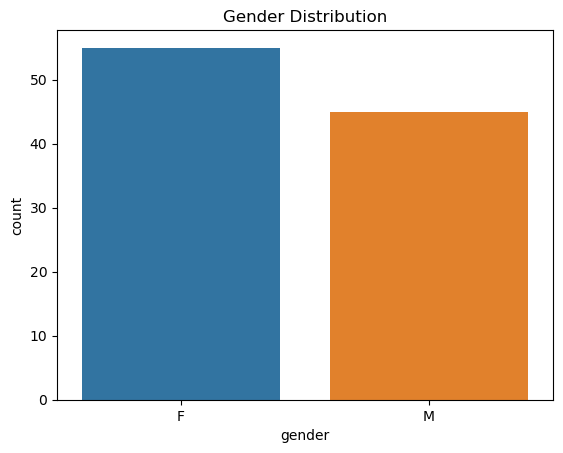

In [133]:
sns.countplot(x="gender", data=patients)
plt.title("Gender Distribution")
plt.show()

In [134]:
patients["gender"].value_counts(normalize=True) * 100

gender
F    55.0
M    45.0
Name: proportion, dtype: float64

### Patient-Level Mortality

The PATIENTS subset contains only deceased patients (100% expire_flag = 1) 



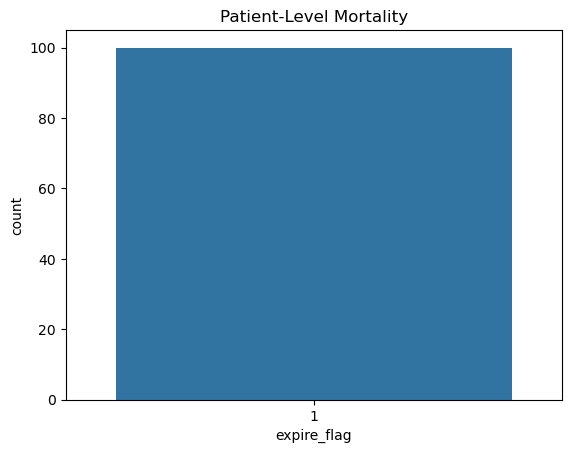

In [135]:
sns.countplot(x="expire_flag", data=patients)
plt.title("Patient-Level Mortality")
plt.show()

In [136]:
patients["expire_flag"].value_counts()

expire_flag
1    100
Name: count, dtype: int64

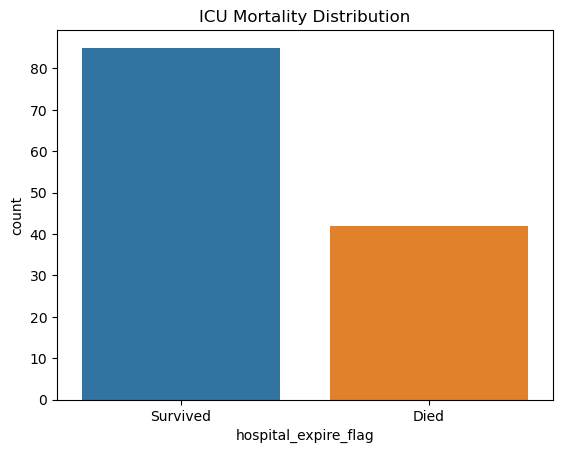

In [169]:
sns.countplot(x="hospital_expire_flag", data=df)
plt.xticks([0,1], ["Survived", "Died"])
plt.title("ICU Mortality Distribution")
plt.show()

In [ ]:
df["hospital_expire_flag"].value_counts(normalize=True) * 100

hospital_expire_flag
0    66.929134
1    33.070866
Name: proportion, dtype: float64

The number of surviving patients is greater than the number of deceased patients.


The number of patients admitted to the ICU due to emergency conditions is greater than the number of patients admitted selectively or urgently.

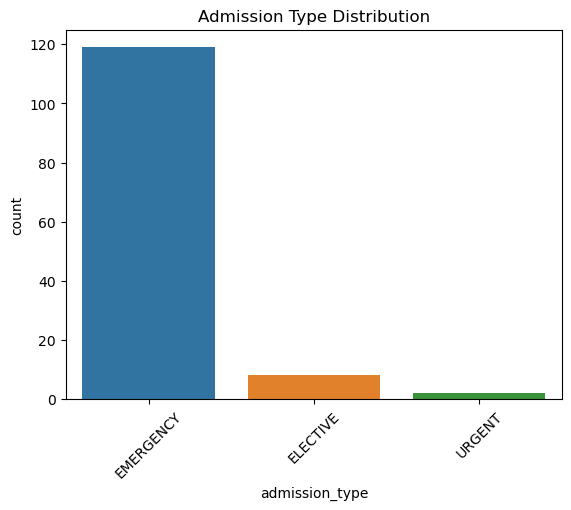

In [137]:
sns.countplot(x="admission_type", data=admissions)
plt.xticks(rotation=45)
plt.title("Admission Type Distribution")
plt.show()

In [138]:
admissions["hospital_expire_flag"].value_counts()

hospital_expire_flag
0    89
1    40
Name: count, dtype: int64

In the ICU, the number of surviving patients is greater than the number of dying patients.


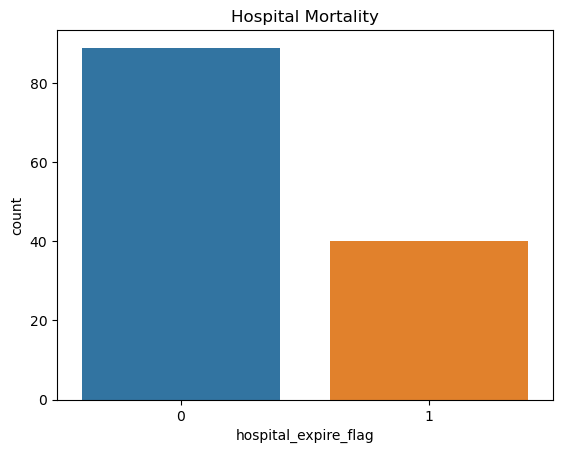

In [139]:
sns.countplot(x="hospital_expire_flag", data=admissions)
plt.title("Hospital Mortality")
plt.show()

The distribution of hospital length of stay is right-skewed, with most patients discharged within the first 10 days.

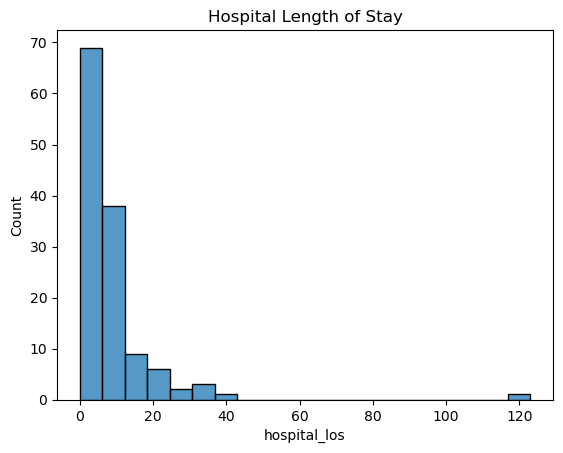

In [140]:
admissions["admittime"] = pd.to_datetime(admissions["admittime"])
admissions["dischtime"] = pd.to_datetime(admissions["dischtime"])
admissions["hospital_los"] = (admissions["dischtime"] - admissions["admittime"]).dt.days

sns.histplot(admissions["hospital_los"], bins=20)
plt.title("Hospital Length of Stay")
plt.show()

In [141]:
admissions["hospital_los"].median()


6.0

ICU length of stay shows a right-skewed distribution, with the majority of patients staying fewer than 5 days

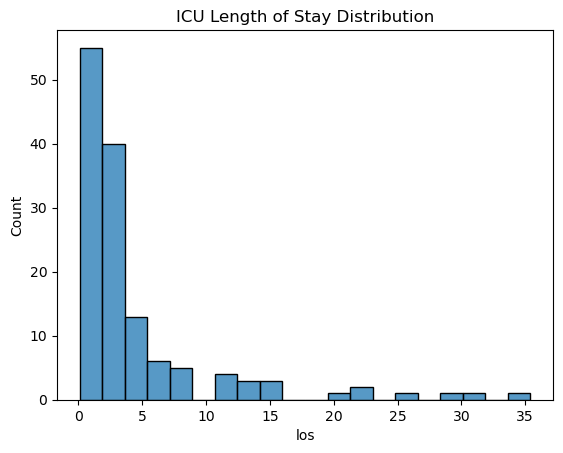

In [142]:
sns.histplot(icu["los"], bins=20)
plt.title("ICU Length of Stay Distribution")
plt.show()

In [143]:
icu["los"].median()

2.1114499999999996

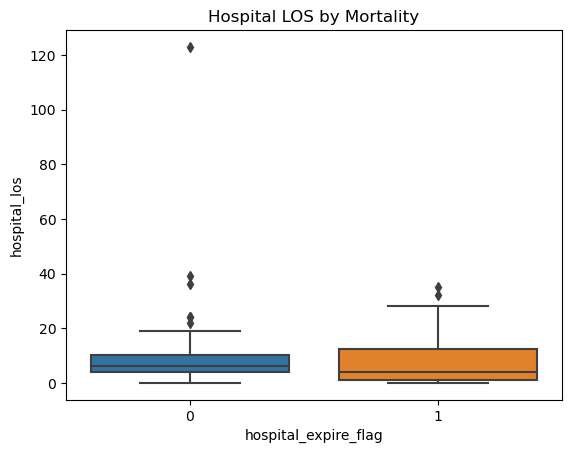

In [145]:
sns.boxplot(x="hospital_expire_flag", y="hospital_los", data=admissions)
plt.title("Hospital LOS by Mortality")
plt.show()

In [146]:
admissions.groupby("hospital_expire_flag")["hospital_los"].median()


hospital_expire_flag
0    6.0
1    4.0
Name: hospital_los, dtype: float64

Even though the hospital length of stay appears slightly higher and more variable among deceased patients, the median values are relatively close, suggesting that the difference may not be substantial.

Step 1 — ICU + ADMISSIONS Merge

In [159]:
df = icu.merge(
    admissions[["subject_id",
                "hadm_id",
                "hospital_expire_flag",
                "admittime",
                "admission_type"]],  
    on=["subject_id","hadm_id"],
    how="left"
)

In [160]:
df = df.merge(
    patients[["subject_id", "dob", "gender"]],
    on="subject_id",
    how="left"
)

In [161]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id                136 non-null    int64         
 1   subject_id            136 non-null    int64         
 2   hadm_id               136 non-null    int64         
 3   icustay_id            136 non-null    int64         
 4   dbsource              136 non-null    object        
 5   first_careunit        136 non-null    object        
 6   last_careunit         136 non-null    object        
 7   first_wardid          136 non-null    int64         
 8   last_wardid           136 non-null    int64         
 9   intime                136 non-null    object        
 10  outtime               136 non-null    object        
 11  los                   136 non-null    float64       
 12  hospital_expire_flag  136 non-null    int64         
 13  admittime           

In [162]:
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")
df["admittime"] = pd.to_datetime(df["admittime"], errors="coerce")

df["age"] = df["admittime"].dt.year - df["dob"].dt.year

In [164]:
df = df[(df["age"] > 0) & (df["age"] < 120)]

Age vs mortality

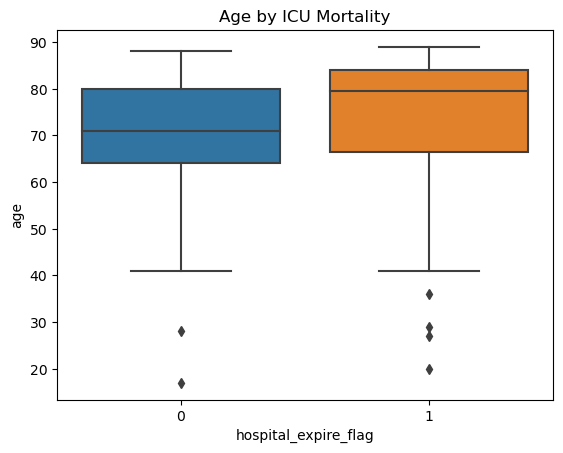

In [ ]:
sns.boxplot(x="hospital_expire_flag", y="age", data=df)
plt.title("Age by ICU Mortality")
plt.show()

In [165]:
df.groupby("hospital_expire_flag")["age"].median()

hospital_expire_flag
0    71.0
1    79.5
Name: age, dtype: float64

The age distribution indicates that deceased ICU patients are generally older than survivors. This pattern suggests that advanced age may be an important risk factor for ICU mortality.

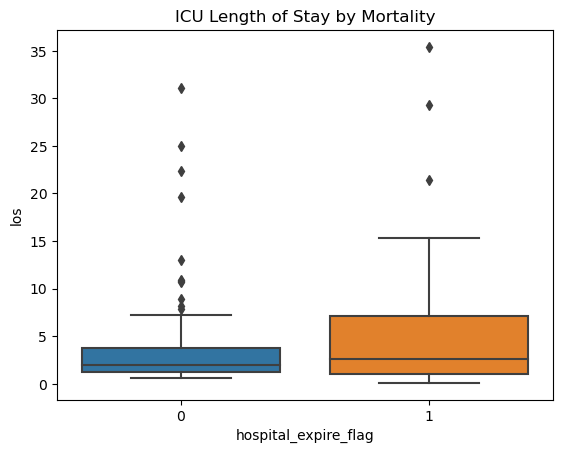

In [ ]:
sns.boxplot(x="hospital_expire_flag", y="los", data=df)
plt.title("ICU Length of Stay by Mortality")
plt.show()

In [168]:
df.groupby("hospital_expire_flag")["los"].median()

hospital_expire_flag
0    2.0003
1    2.6482
Name: los, dtype: float64

ICU stay is slightly longer in those who die, but the difference isn't as strong as it is with age.

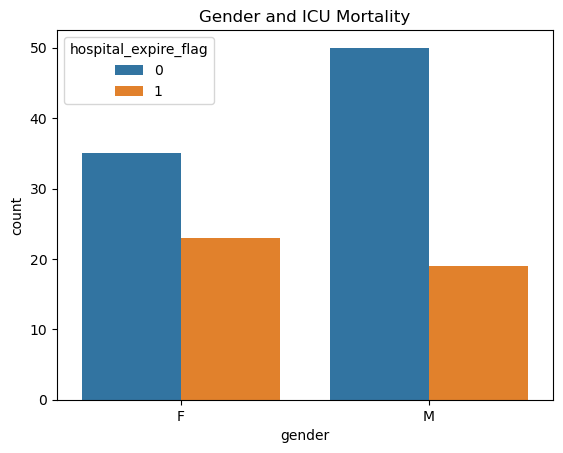

In [ ]:
sns.countplot(x="gender", hue="hospital_expire_flag", data=df)
plt.title("Gender and ICU Mortality")
plt.show()

In [170]:
pd.crosstab(df["gender"],
            df["hospital_expire_flag"],
            normalize="index") * 100

hospital_expire_flag,0,1
gender,,
F,60.344828,39.655172
M,72.463768,27.536232


Female patients have a higher chance of dying than male patients.

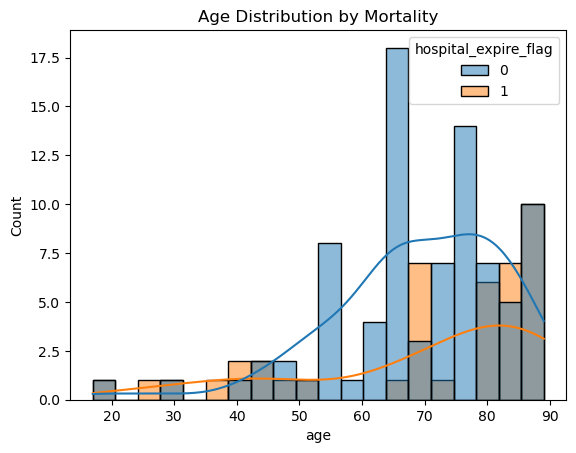

In [ ]:
sns.histplot(data=df, x="age", hue="hospital_expire_flag", bins=20, kde=True)
plt.title("Age Distribution by Mortality")
plt.show()

In [ ]:
df.groupby("hospital_expire_flag")[["age","los"]].mean()

,age,los
hospital_expire_flag,,
0,69.164706,3.919832
1,69.976190,6.033186


The age distribution suggests that mortality is more concentrated among older ICU patients. 

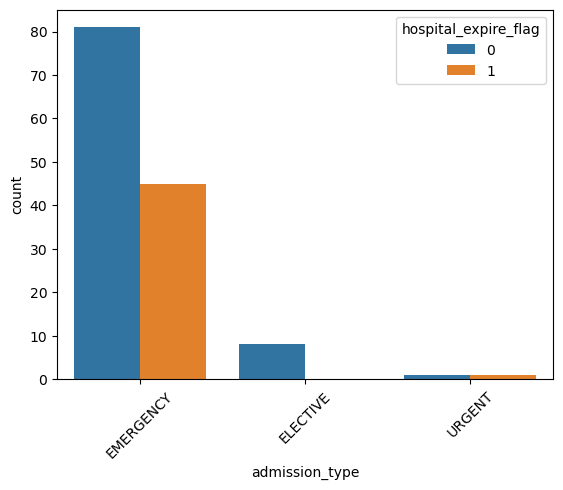

In [ ]:
sns.countplot(x="admission_type",
              hue="hospital_expire_flag",
              data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.crosstab(df["admission_type"],
            df["hospital_expire_flag"],
            normalize="index") * 100

hospital_expire_flag,0,1
admission_type,,
ELECTIVE,100.000000,0.000000
EMERGENCY,64.285714,35.714286
URGENT,50.000000,50.000000
